## Analyse des données & wordcloud

Membres : 

- Bastien HOTTELET
- Pascal ZHAN
- Fatih FIDAN
- Lilian SOARES
- Tamij SARAVANAN
- Kévin POSTIC
- Evan PARIS

Date : 15/12/2023

Description : Analyse des données du dataset avec une variété de représentations visuelles telles que des nuages de mots, histogrammes et diagrammes circulaires.

<br/>

## Dépendance à installer

<p><u>Pandas :</u> Permet de manipuler et d'analyser les données, il offre des structures de données flexibles et des outils performants.</p>

In [1]:
!pip install pandas

<br/>

<p><u>Matplotlib :</u> Permet de créer des graphiques et de représenter les données.</p>

In [2]:
!pip install matplotlib

<br/>

<p><u>WordCloud :</u> Outil permettant de générer des nuages de mots à partir de texte, offrant une représentation visuelle des mots les plus utilisés.</p>

In [3]:
!pip install wordcloud

<br/>

<p><u>Plotly :</u> Permet de créer des graphiques et des tableaux interactive. </p>

In [4]:
!pip install plotly

<br/>

<p><u>sklearn :</u> Ensemble d'outils efficaces pour le machine learning, incluant des algorithmes de classification, régression et clustering. </p>

In [5]:
!pip install scikit-learn

<br/>

## Importation 

In [6]:
import pandas as pd
print("pandas a été importer")

from wordcloud import WordCloud, STOPWORDS
print("wordcloud a été importer")

import matplotlib.pyplot as plt
print("matplotlib a été importer")

from sklearn.feature_extraction.text import CountVectorizer
print("sklearn a été importer")

import plotly.express as px
print("plotly a été importer")

pandas a été importer
wordcloud a été importer
matplotlib a été importer
sklearn a été importer
plotly a été importer


<br/>

## Lecture du dataset

Pour accéder au dataset, il est nécessaire au préalable de le télécharger depuis <a href="https://www.kaggle.com/datasets/jpmiller/layoutlm">kaggle</a>.

Une fois celui-ci télécharger, nous pouvons passer à l'étape suivante qui consiste à utiliser la bibliothèque Pandas afin d'effectuer la lecture et la manipulation des données du dataset 

In [8]:
#Lecture du dataset avec pandas
dataset = pd.read_csv('medquad.csv')

#Suppression des données vide
dataset = dataset.dropna()

#Affichage des premières lignes
print(dataset.head())


                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  


<br/><br/>

Nous allons maintenant séparer notre dataset en quatre parties, afin de filtrer nos données par les colonnes, les données seront plus simples à traiter pour la suite.

In [9]:
#Séparation de la colonne 'question'
question = dataset['question']
print(question.head())

0                  What is (are) Glaucoma ?
1                    What causes Glaucoma ?
2       What are the symptoms of Glaucoma ?
3    What are the treatments for Glaucoma ?
4                  What is (are) Glaucoma ?
Name: question, dtype: object


<br/>

In [10]:
#Séparation de la colonne 'answer'
answer = dataset['answer']
print(answer.head())

0    Glaucoma is a group of diseases that can damag...
1    Nearly 2.7 million people have glaucoma, a lea...
2    Symptoms of Glaucoma  Glaucoma can develop in ...
3    Although open-angle glaucoma cannot be cured, ...
4    Glaucoma is a group of diseases that can damag...
Name: answer, dtype: object


<br/>

In [11]:
#Séparation de la colonne 'source'
source = dataset['source']
print(source.head())

0    NIHSeniorHealth
1    NIHSeniorHealth
2    NIHSeniorHealth
3    NIHSeniorHealth
4    NIHSeniorHealth
Name: source, dtype: object


<br/>

In [12]:
#Séparation de la colonne 'focus_area'
focus_area = dataset['focus_area']
print(focus_area.head())

0    Glaucoma
1    Glaucoma
2    Glaucoma
3    Glaucoma
4    Glaucoma
Name: focus_area, dtype: object


<br/>

## WordCloud

#### <strong> Notre démarche </strong>

<p> Pour créer notre nuage de mots, nous utilisons le module 'wordcloud'. Ce module est conçu pour générer des visualisations de nuages de mots à partir de texte. Ensuite, afin d'afficher le nuage de mots nous utilisons le module 'matplotlib'. </p>

Nous avons créé cinq nuages de mots différents en raison de la présence de plusieurs colonnes dans notre ensemble de données :
- question : nous avons généré un nuage de mot à partir des questions présentes dans le dataset,
- answer : de la même façon, nous avons créé un nuage de mot avec les answer présentes dans le dataset,
- source : un nuage de mot spécifique aux sources disponibles dans le dataset,
- focus_area : avec les données du focus_area nous avons créé un autre nuage de mot grâce aux données présentes dans le dataset,
- global : Enfin, nous avons généré un nuage de mots global qui combine les mots clés des quatre catégories précédentes (question, answer, source, focus_area).

<p> L'objectif de cette approche est de fournir une visualisation détaillée des mots clés dans chaque catégorie spécifique, tout en offrant également une vue d'ensemble globale avec des termes les plus fréquemment utilisés dans l'ensemble du jeu de données.  </p>

<p> Cette démarche permet une compréhension approfondie du contenu textuel de chaque catégorie et de son importance relative dans l'ensemble des données.</p>

<br/>

#### <strong> Explication du code 'wordcloud' </strong> 
Le code pour créer le nuage de mot est très simple à comprendre et a utilisé : 

Dans un premier temps, nous sélectionnons la catégorie/colonne qui nous intéresse et nous la concaténons afin d'avoir un seul et unique texte pour avoir tous les mots.

Dans un second temps, nous créons le nuage de mot grâce à la méthode 'WordCloud' et nous lui définissons ses paramètres comme la taille de l'image ou encore la couleur de fond de celui-ci.

Enfin, nous terminons en générant le nuage de mot.

Une fois celui-ci générer, nous l'affichons grâce à 'matplotlib'.

<br/>

### WordCloud (question)

In [15]:
#On concatène toute la colonne 'question'
concatenate_question = " ".join(i for i in question)

wordcloud_question = WordCloud(background_color="white", width=3840, height=2160)
wordcloud_question = wordcloud_question.generate(concatenate_question)

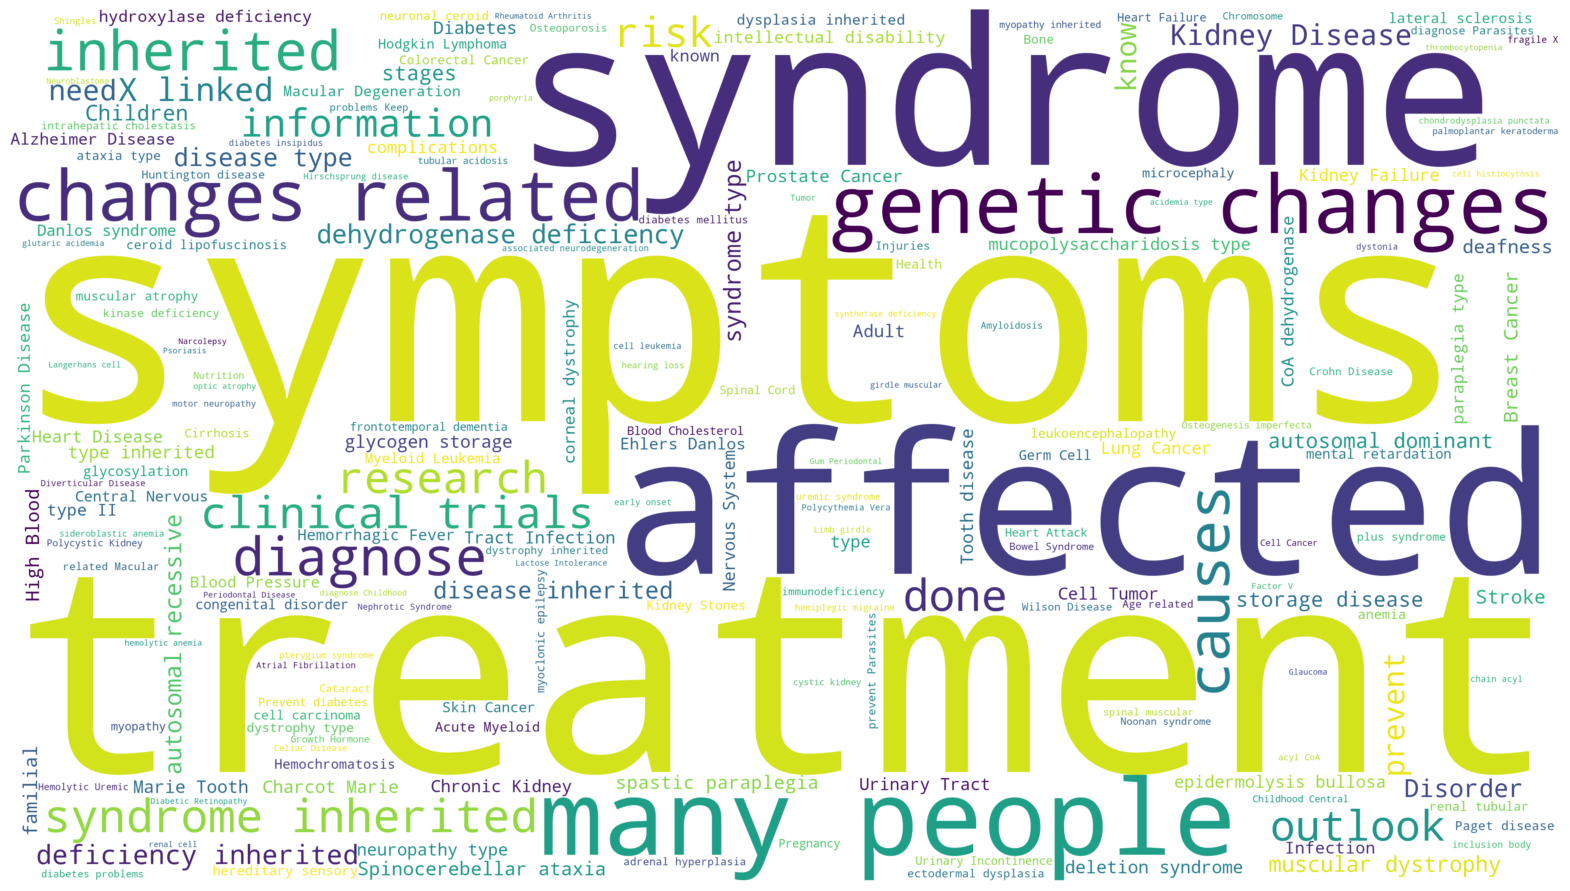

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_question, interpolation='bilinear')
plt.axis("off")
plt.show()

<br/><br/>

### WordCloud (answer)

In [21]:
#On concatène toute la colonne 'answer'
concatenate_answer = " ".join(i for i in answer)

wordcloud_answer = WordCloud(background_color="white", width=3840, height=2160)
wordcloud_answer = wordcloud_answer.generate(concatenate_answer)

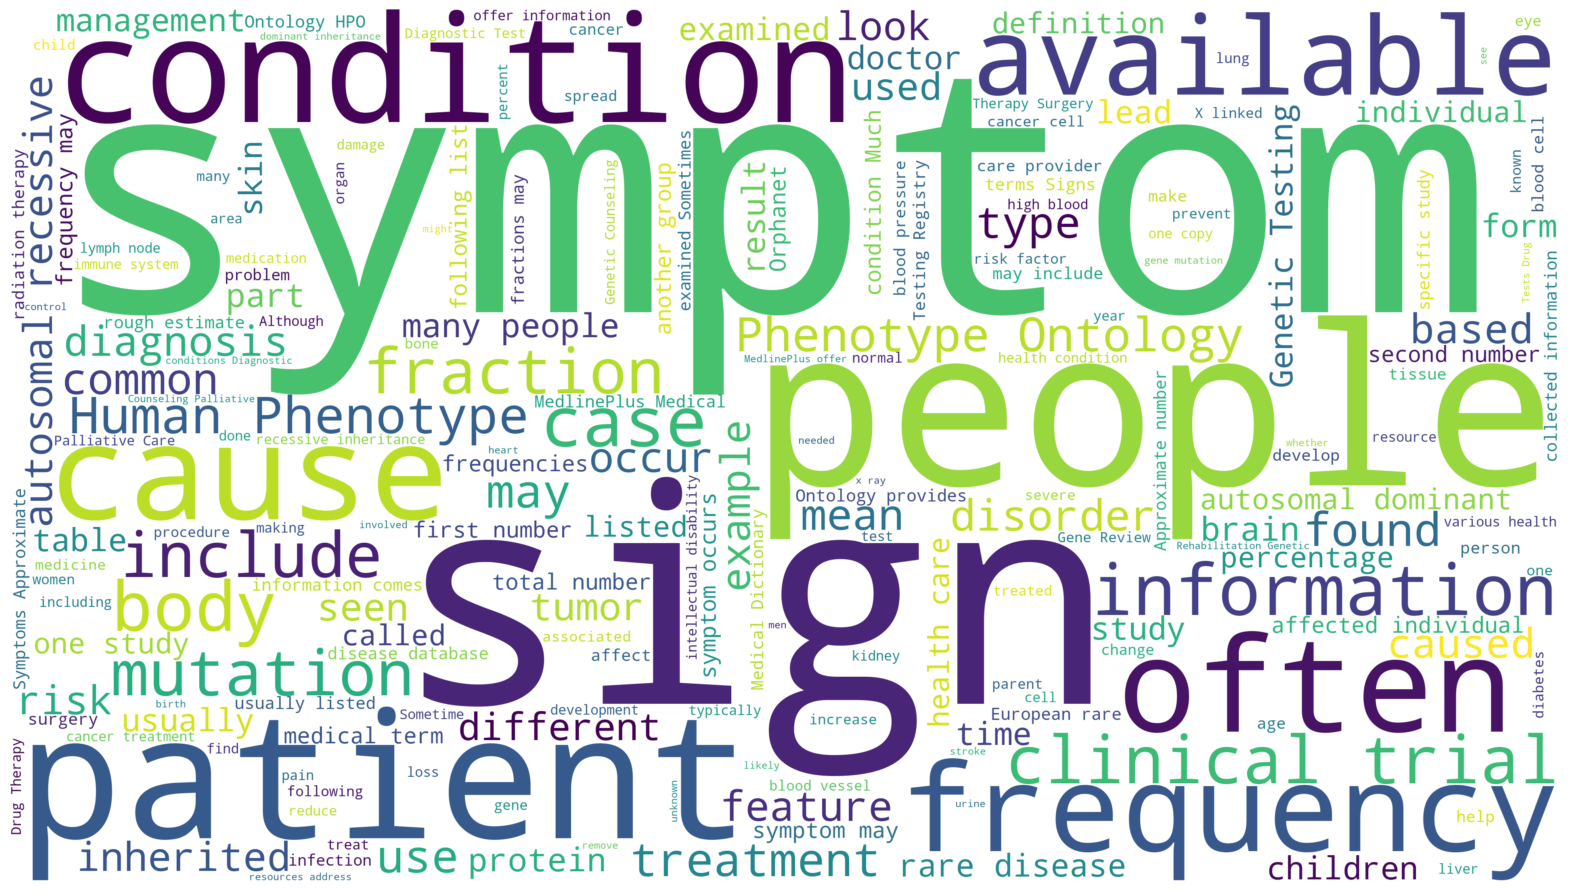

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_answer, interpolation='bilinear')
plt.axis("off")
plt.show()

<br/><br/>

### WordCloud (source)

In [23]:
#On concatène toute la colonne 'source'
concatenate_source = " ".join(i for i in source)

wordcloud_source = WordCloud(background_color="white", width=3840, height=2160)
wordcloud_source = wordcloud_source.generate(concatenate_source)

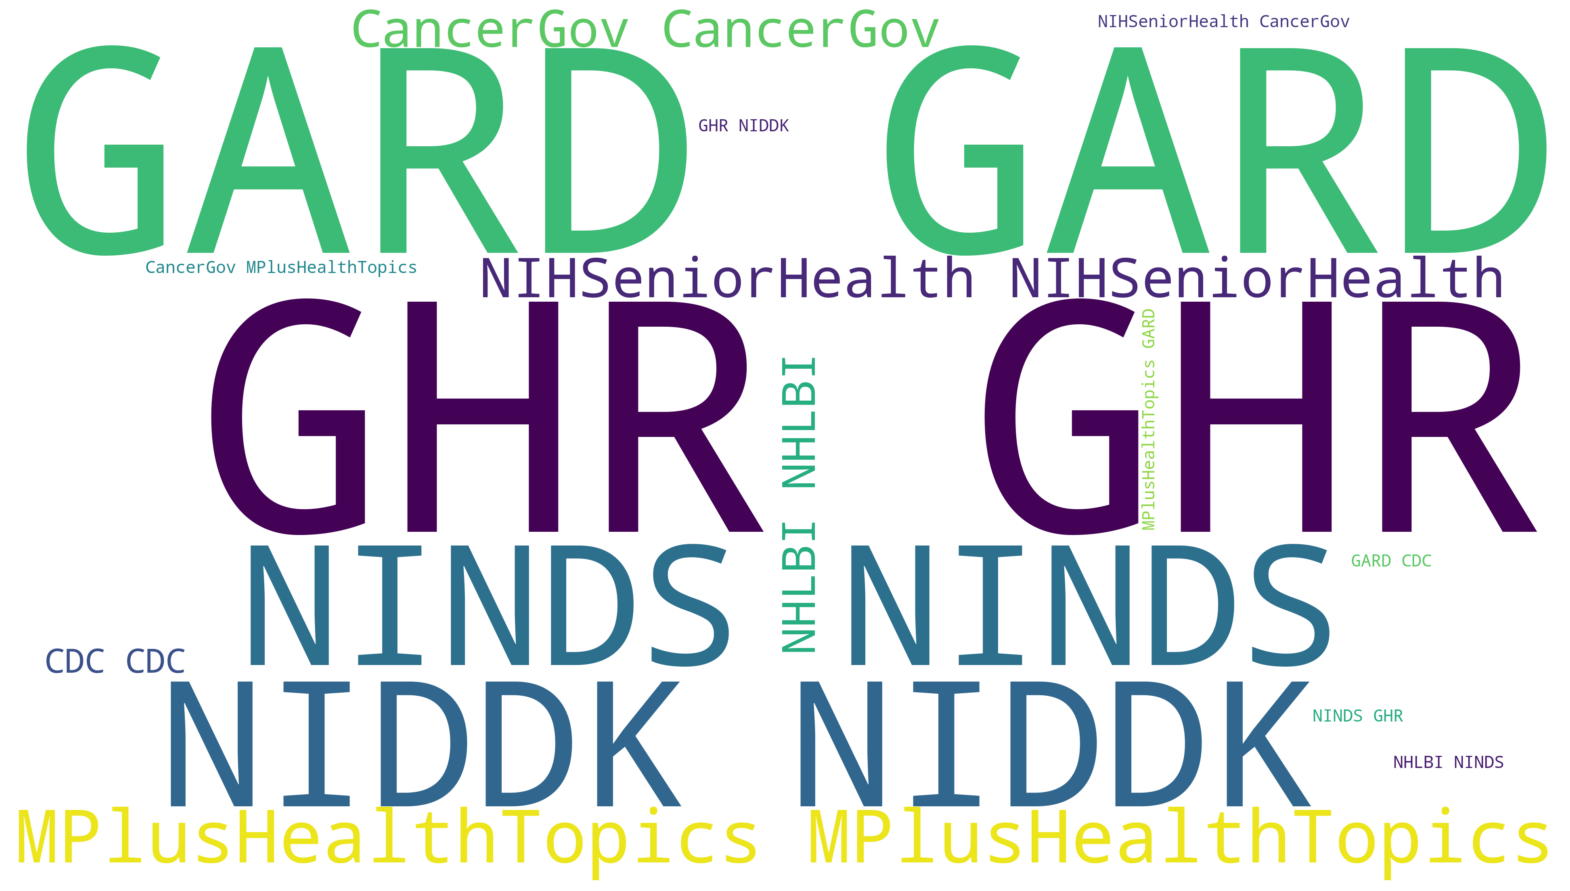

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_source, interpolation='bilinear')
plt.axis("off")
plt.show()

<br/><br/>

### WordCloud (focus_area)

In [29]:
#On concatène toute la colonne 'focus_area'
concatenate_focus_area = " ".join(i for i in focus_area)

wordcloud_focus_area = WordCloud(background_color="white", width=3840, height=2160)
wordcloud_focus_area = wordcloud_focus_area.generate(concatenate_focus_area)

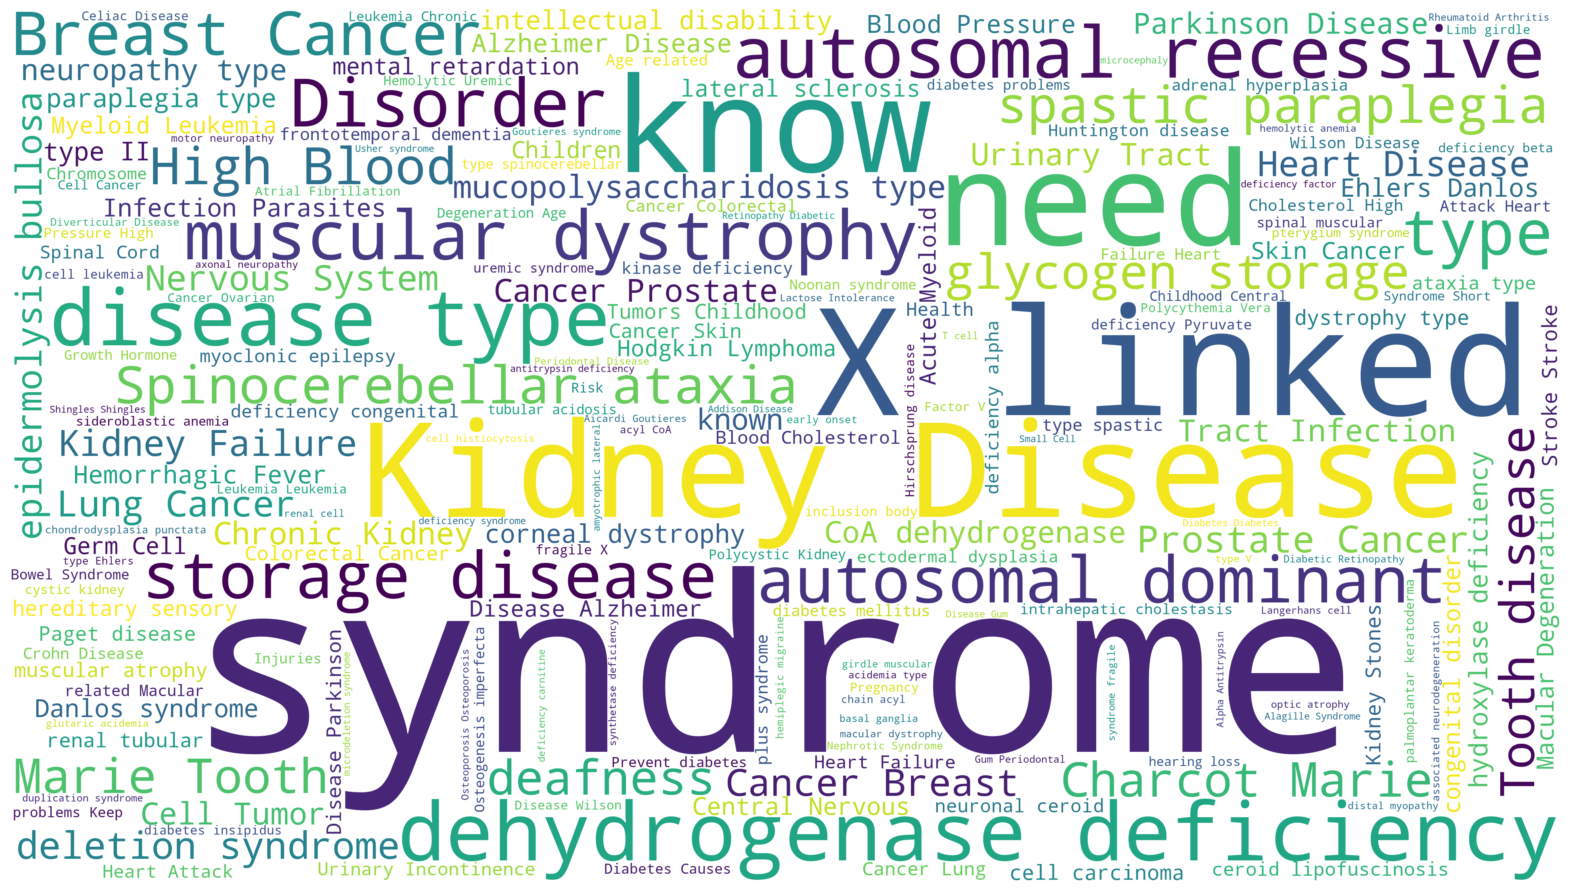

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_focus_area, interpolation='bilinear')
plt.axis("off")
plt.show()

<br/><br/>

### WordCloud (global)

In [36]:
#On concatène toute la colonne 'answer', 'question', 'source', 'focus_area'
concatenate_global = concatenate_answer + " " + concatenate_question + " " + concatenate_source + " " + concatenate_focus_area

wordcloud_global = WordCloud(background_color="white", width=3840, height=2160)
wordcloud_global = wordcloud_global.generate(concatenate_global)

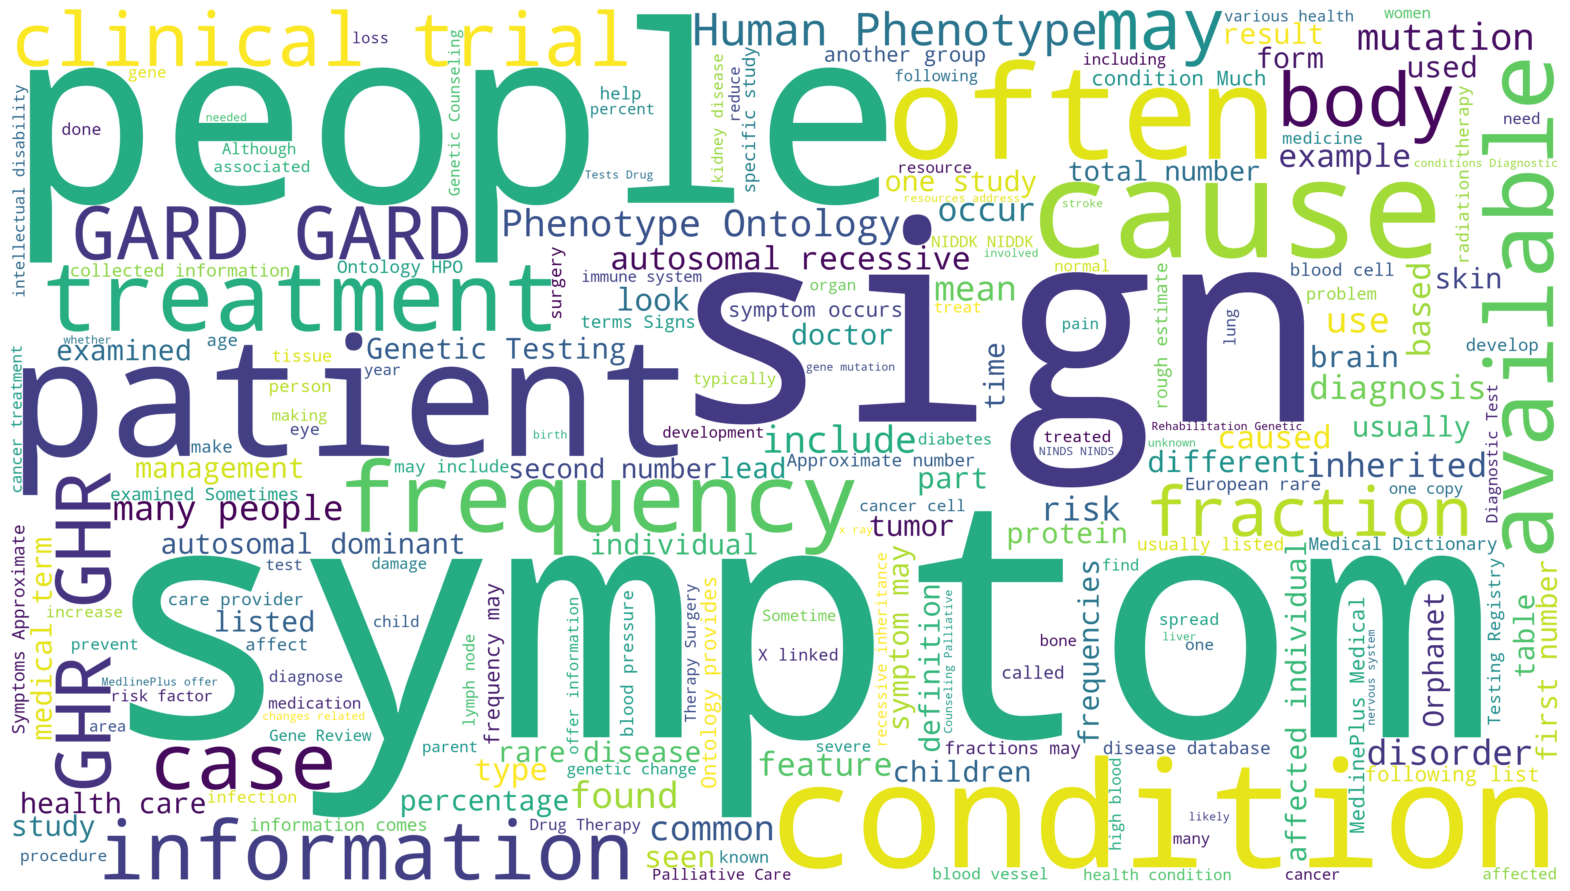

In [37]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_global, interpolation='bilinear')
plt.axis("off")
plt.show()

<br/><br/>

## Autre représentation de donnée

Pour approfondir notre analyse du dataset initial, nous avons exploré diverses représentations visuelles en complément au nuage de mots. Ces nouvelles visualisations offrent des représentation plus détaillée.

<br/>

### Mots apparaissent le plus

Le code suivant analyse la fréquence des mots existant dans le dataset. On utilise scikit-learn, afin de créer une matrice avec le texte existant pour compter le nombre de fois qu'un mot apparaît, puis on le trie par ordre décroissant afin d'avoir le plus grand nombre et on garde les 50 premiers résultats.

In [39]:
dataset['global'] = question + ' ' + answer + ' ' + source + ' ' + focus_area

vectorizer = CountVectorizer()

word_counts = vectorizer.fit_transform(dataset['global'])
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_sum = word_counts_df.sum()

result_df = pd.DataFrame({'Word': word_counts_df.columns, 'Count': word_counts_sum})
result_df = result_df.sort_values(by='Count', ascending=False)
top_50_words = result_df.head(50)

print(result_df)

              Word   Count
the            the  197960
of              of  128419
and            and   84162
in              in   70288
is              is   64176
...            ...     ...
ifheart    ifheart       1
ifitm5      ifitm5       1
ift122      ift122       1
ift43        ift43       1
payments  payments       1

[29130 rows x 2 columns]


<br/>

Le code suivant utilise la bibliothèque Matplotlib pour crée un graphique representants les 50 mots les plus fréquents du dataset.

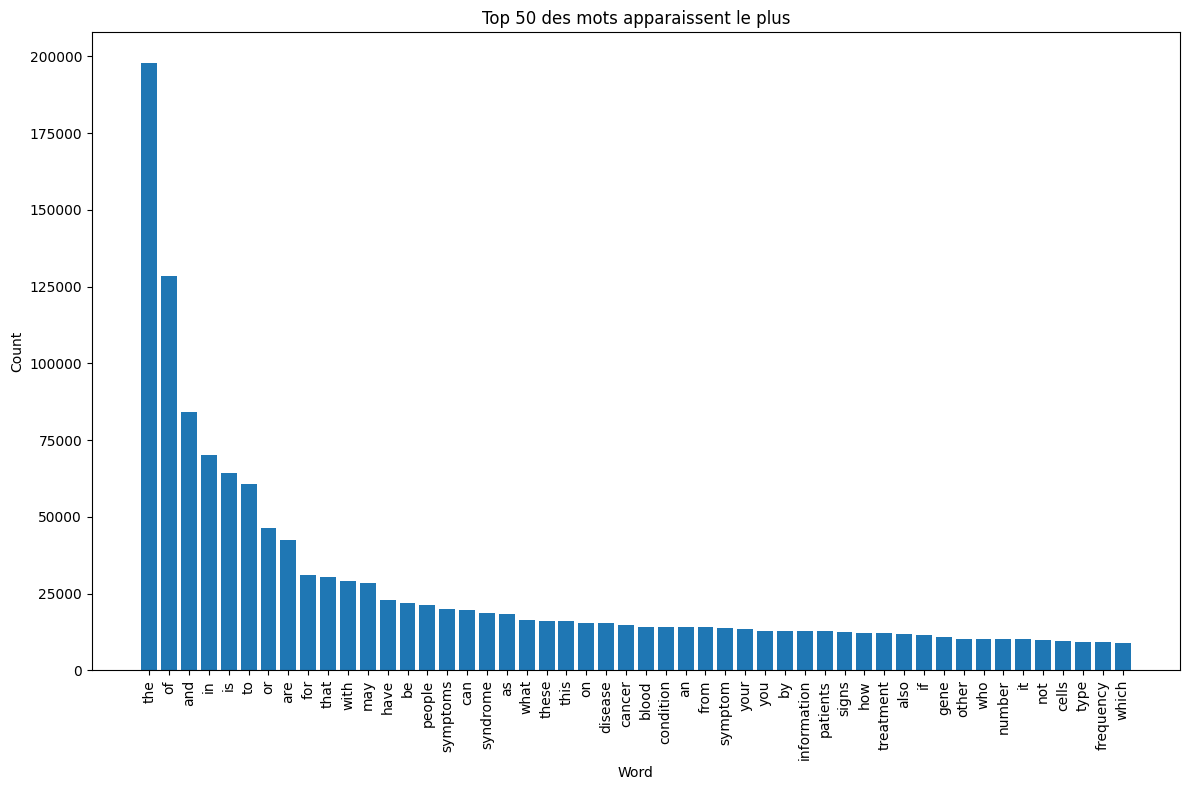

In [42]:
plt.figure(figsize=(12, 8))
plt.bar(top_50_words['Word'], top_50_words['Count'])
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 50 des mots apparaissent le plus')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<br/>

Cette fois-ci, nous avons utilisé la librairie Plotly, afin de créer une représentation graphique interactive des 50 mots les plus fréquents issus du dataset.

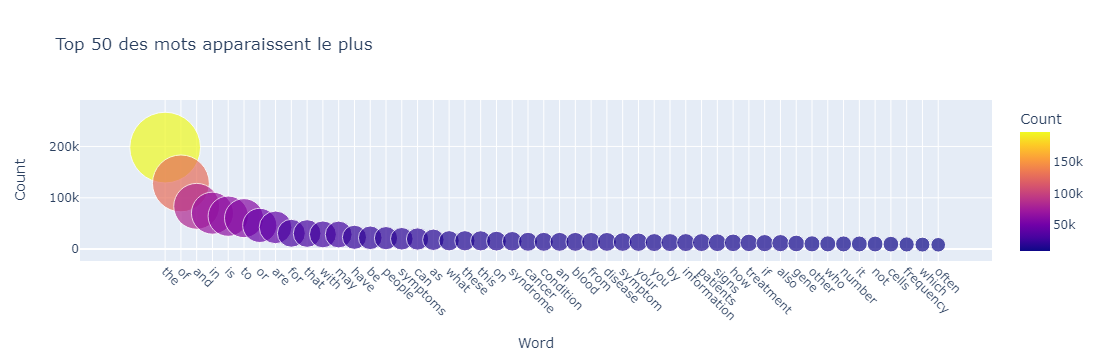

In [69]:
fig = px.scatter(top_50_words, x='Word', y='Count', size='Count', color='Count',
                 labels={'Word': 'Word', 'Count': 'Count'},
                 title='Top 50 des mots apparaissent le plus',
                 size_max=50)

fig.update_layout(
    xaxis=dict(tickangle=45),
    showlegend=False
)

fig.show()

<br/><br/>

### Répartitions des sources

Le bout de code ci-dessous réalise le décompte du nombre d'occurrences de chaque source dans le dataset, il fournit ainsi une distribution des sources présentes.

Pour la suite, nous avons utilisé le module Matplotlib afin de créer un diagramme montrant la fréquence relative de chaque source dans les données.

In [58]:
nbr_source = source.value_counts()

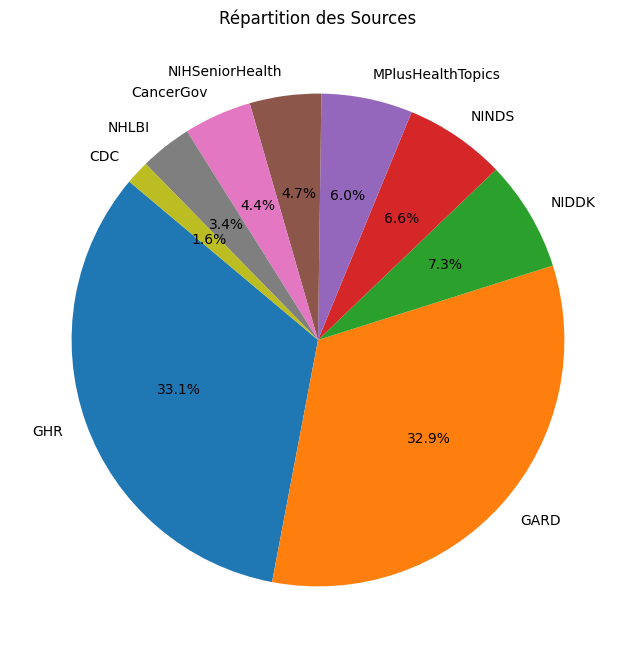

In [59]:
plt.figure(figsize=(8, 8))
plt.pie(nbr_source, labels=nbr_source.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Sources')
plt.show()

<br/>

Cette fois-ci, nous avons représenté les données sous forme d'un histogramme à l'aide du module Matplotlib.

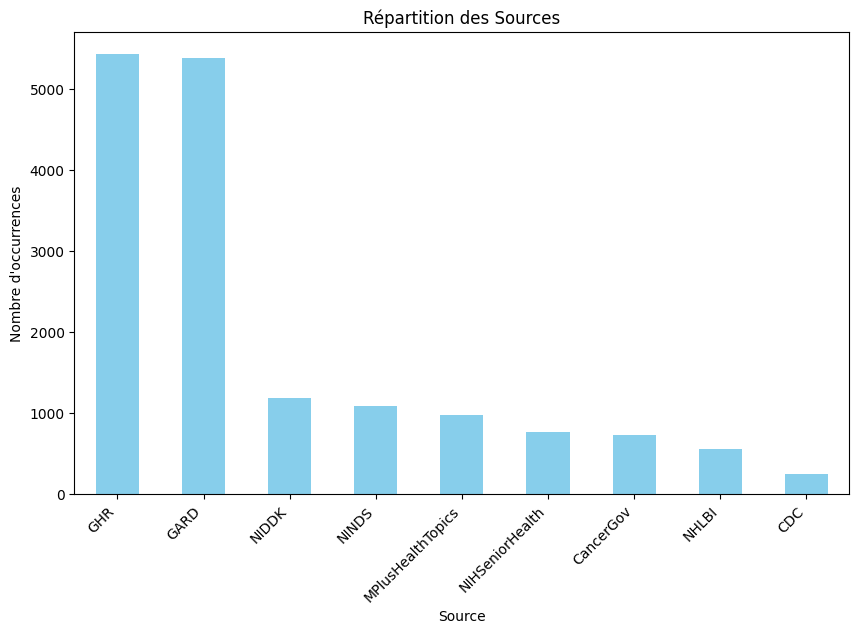

In [60]:
plt.figure(figsize=(10, 6))
nbr_source.plot(kind='bar', color='skyblue')
plt.title('Répartition des Sources')
plt.xlabel('Source')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

<br/><br/>

### Visualisation focus_area

De la même façon que le code précèdent, nous avons réalisé le décompte du nombre d'occurrences de chaque focus_area dans le dataset, il fournit ainsi une distribution des focus_area présentes dans une limite de 30.

Pour la suite, nous avons utilisé le module Matplotlib, afin de créer un diagramme montrant la fréquence relative de chaque focus_area dans les données.

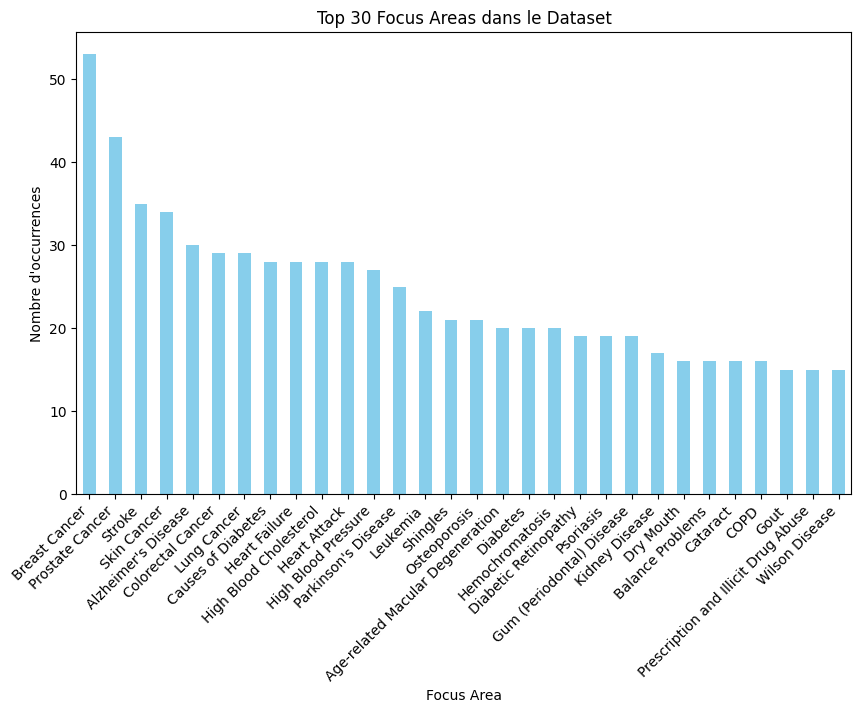

In [34]:
nbr_focus_area = focus_area.value_counts().head(30)

plt.figure(figsize=(10, 6))
nbr_focus_area.plot(kind='bar', color='skyblue')
plt.title('Top 30 Focus Areas dans le Dataset')
plt.xlabel('Focus Area')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')  
plt.show()

<br/><br/>